<a href="https://colab.research.google.com/github/Angorith/acorn_python/blob/main/0614_26%EC%9D%BC%EC%B0%A8_AI(%EB%94%A5%EB%9F%AC%EB%8B%9D)%5Bsoftmax_origin%5DMNIST(%EC%86%90%EA%B8%80%EC%94%A8%EB%B6%84%EB%A5%98)%2C%EC%86%90%EC%8B%A4%ED%95%A8%EC%88%98%2Ccross_entropy_error%EA%B3%B5%ED%86%B5%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B82%EB%B2%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('seoul0606hour.csv', encoding='cp949')

In [ ]:
df

In [ ]:
df.columns=['num','loc','time(hour)','tem(°C)']

In [ ]:
df = df.replace('서울','Seoul')

In [ ]:
df

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   num         144 non-null    int64  
 1   loc         144 non-null    object 
 2   time(hour)  144 non-null    object 
 3   tem(°C)     144 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ KB


In [ ]:
df['new_Date'] = pd.to_datetime(df['time(hour)'])

In [ ]:
df.head()

In [ ]:
df.drop('time(hour)', axis = 1, inplace=True)
df.set_index('new_Date', inplace=True)

In [ ]:
df.head()

,num,loc,tem(°C)
new_Date,,,
2022-05-31 01:00:00,108,Seoul,16.7
2022-05-31 02:00:00,108,Seoul,16.2
2022-05-31 03:00:00,108,Seoul,15.4
2022-05-31 04:00:00,108,Seoul,14.9
2022-05-31 05:00:00,108,Seoul,14.4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 2022-05-31 01:00:00 to 2022-06-06 00:00:00
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   num      144 non-null    int64  
 1   loc      144 non-null    object 
 2   tem(°C)  144 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.5+ KB


In [ ]:
hour = df['time(hour)'].str.split(" ")

hour_list = []
date_list = []
for i in hour :
    date_list.append(i[0])
    hour_list.append(i[1])

    #추출완료
    #'min' 컬럼 생성
df['date'] = date_list
df['hour'] = hour_list

In [ ]:
df

In [ ]:
plt.figure(figsize=(16,10))
plt.title('2022-06-06 Seoul temp.', fontsize = 20)
plt.plot(df['new_Date'], df['tem(°C)'])
#plt.xticks(['01:00','03:22','06:43','10:09','13:40','17:11','20:39','00:00'],rotation=45)
plt.xlabel('HOUR.', fontsize = 15)
plt.ylabel('TEMP(°C)',fontsize = 15)
plt.show()

In [ ]:
df2 = pd.read_csv('seoul0606min.csv', encoding='cp949')

In [ ]:
df2.describe()

,지점,기온(°C)
count,1397.0,1397.000000
mean,108.0,19.856335
std,0.0,2.316277
min,108.0,16.700000
25%,108.0,17.900000
50%,108.0,19.300000
75%,108.0,21.700000
max,108.0,24.500000


In [ ]:
df = pd.read_csv('seoul0606min.csv', encoding='cp949')

    #컬럼 영어변환
df.columns=['num','loc','time(min)','tem(°C)']


    #'서울'을 seoul로 변환
df = df.replace('서울','Seoul')


    #dataframe에 분만 표시하는 값 만들기
min = df['time(min)'].str.split(" ")

min_list = []
for i in min :
    min_list.append(i[1])
    #추출완료
    #'min' 컬럼 생성
df['min'] = min_list

In [ ]:
df

,num,loc,time(min),tem(°C),min
0,108,Seoul,2022-06-06 00:01,20.2,00:01
1,108,Seoul,2022-06-06 00:02,20.2,00:02
2,108,Seoul,2022-06-06 00:03,20.2,00:03
3,108,Seoul,2022-06-06 00:04,20.2,00:04
4,108,Seoul,2022-06-06 00:05,20.2,00:05
...,...,...,...,...,...
1392,108,Seoul,2022-06-06 23:56,16.7,23:56
1393,108,Seoul,2022-06-06 23:57,16.7,23:57
1394,108,Seoul,2022-06-06 23:58,16.7,23:58
1395,108,Seoul,2022-06-06 23:59,16.7,23:59


In [ ]:
df['tem(°C)'].mean()

19.85633500357909

AttributeError: ignored

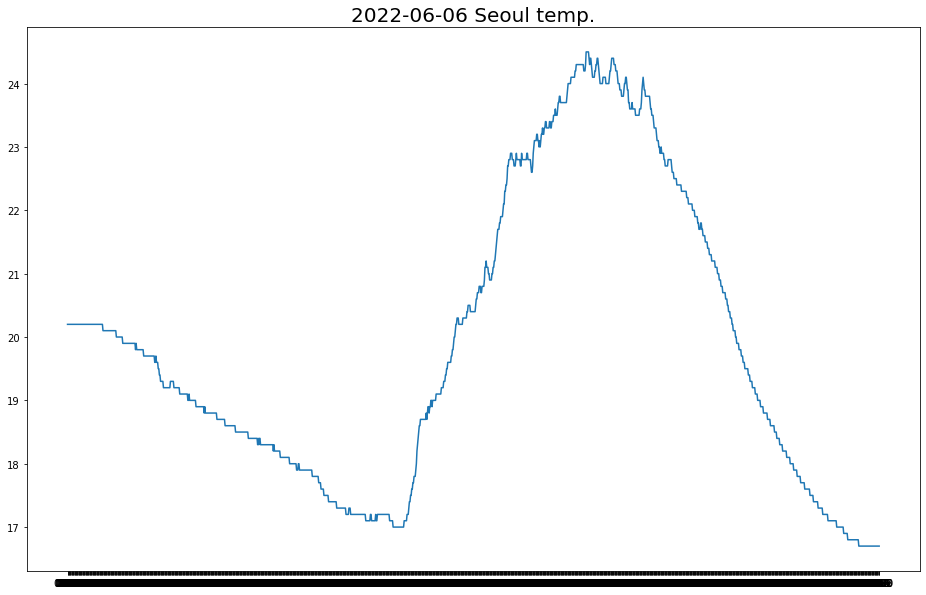

In [ ]:
  #그래프 그리기
plt.figure(figsize=(16,10))
plt.title('2022-06-06 Seoul temp.', fontsize = 20)
plt.plot(df['min'], df['tem(°C)'])
plt.hline(df['tem(°C)'].mean())
plt.xticks(['00:01','03:22','06:43','10:09','13:40','17:11','20:39','00:00'],rotation=45)
plt.xlabel('MIN.', fontsize = 15)
plt.ylabel('TEMP(°C)',fontsize = 15)
plt.show()

# 1

In [ ]:
x = np.array([1,2,3,4])

In [ ]:
np.exp(x)/np.sum(np.exp(x))

array([0.0320586 , 0.08714432, 0.23688282, 0.64391426])

In [ ]:
adj_x = x-np.max(x) #softmax에 적용시킬 함수

In [ ]:
adj_x

array([-3, -2, -1,  0])

In [ ]:
np.exp(adj_x)/np.sum(np.exp(adj_x))

array([0.0320586 , 0.08714432, 0.23688282, 0.64391426])

In [ ]:
def softmax_origin(a):
    c=np.max(a)
    exp_a = np.exp(a-c) #Overflow 대칭
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

In [ ]:
softmax_origin(x)

array([0.0320586 , 0.08714432, 0.23688282, 0.64391426])

In [ ]:
def softmax(x):
    if x.ndim ==2:
        #print(x)
        x = x.T     #x값 전치
        x = x-np.max(x, axis=0)
        y = np.exp(x)/np.sum(np.exp(x),axis=0)
        return y.T
    #print(x)
    x = x- np.max(x)    #Overflow 대체
    return np.exp(x)/ np.sum(np.exp(x))

In [ ]:
softmax(x)

[1 2 3 4]


array([0.0320586 , 0.08714432, 0.23688282, 0.64391426])

In [ ]:
x = np.array([[1,2,3],[4,2,1]])

In [ ]:
x.T

array([[1, 4],
       [2, 2],
       [3, 1]])

In [ ]:
np.max(x.T, axis=0)

array([3, 4])

In [ ]:
x.T- np.max(x.T, axis=0)

array([[-2,  0],
       [-1, -2],
       [ 0, -3]])

In [ ]:
x - np.max(x.T, axis=1)

array([[-3,  0,  0],
       [ 0,  0, -2]])

In [ ]:
x - np.max(x.T, axis=0) #위치들의 값이 안맞음 ValueError: operands could not be broadcast together with shapes (2,3) (2,) 

In [ ]:
x 

array([[1, 2, 3],
       [4, 2, 1]])

In [ ]:
x_result = softmax(x)

In [ ]:
x_result

In [ ]:
np.sum(x_result[0])

In [ ]:
np.sum(x_result[1])

In [ ]:
x = np.array([2,6])

In [ ]:
softmax(x)

[2 6]


array([0.01798621, 0.98201379])

index = 0일확률 1.7%

index = 1일 확률 98.2%

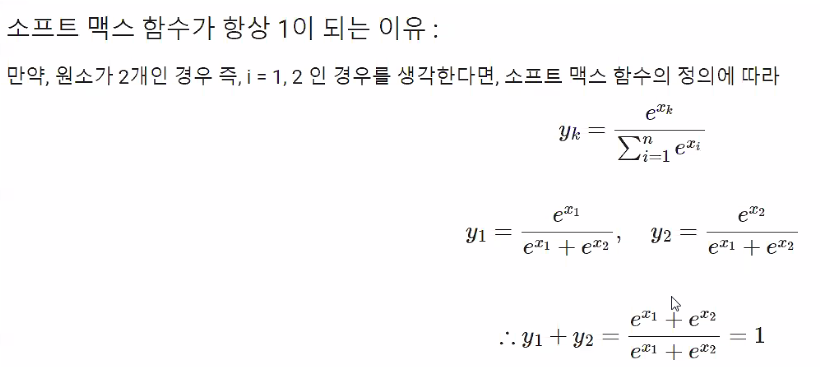

MNIST : 손글씨 숫자 이미지 집합

0부터 0까지의 숫자 이미지로 구성

훈련 이미지가 60000장, 시험 이미지가 10000장 준비된

훈련 이미지로 모델을 학습, 시험 이미지들을 얼마나 정확하게 분류하는지를 평가함

MNIST의 이미지 데이터는 28X28크기의 회색조 이미지, 각 픽셀값은 0~255. 각 이미지에는 실제 의미하는 숫자가 레이블로 붙어있음.


In [ ]:
%%writefile mnist.py
# coding: utf-8
try:
    import urllib.request
except ImportError:
    raise ImportError('You should use Python 3.x')  #너는 파이썬 3.0이상 써야한다
import os.path
import gzip     #압축해주는 라이브러리
import pickle   #바이너리파일 만들어주는거
import os
import numpy as np


url_base = 'http://yann.lecun.com/exdb/mnist/'  #URL에서 가져옴
key_file = {        #딕셔너리로 설정
    'train_img':'train-images-idx3-ubyte.gz',
    'train_label':'train-labels-idx1-ubyte.gz',
    'test_img':'t10k-images-idx3-ubyte.gz',
    'test_label':'t10k-labels-idx1-ubyte.gz'
}

dataset_dir = os.path.dirname(os.path.abspath(__file__))#abs절대경로, __file__은 현재 파일
save_file = dataset_dir + "/mnist.pkl"  #절대경로에다가 mnist.pkl생성

train_num = 60000
test_num = 10000
img_dim = (1, 28, 28)
img_size = 784


def _download(file_name):
    file_path = dataset_dir + "/" + file_name
    
    if os.path.exists(file_path):
        return

    print("Downloading " + file_name + " ... ")
    urllib.request.urlretrieve(url_base + file_name, file_path)
    #urlretrieve: Url로 표시된 네트워크 객체를 파일로 복사해준다
    #내꺼에 복사해준다.
    print("Done")
    
def download_mnist():
    for v in key_file.values():
       _download(v)
        
def _load_label(file_name):
    file_path = dataset_dir + "/" + file_name
    
    print("Converting " + file_name + " to NumPy Array ...")
    with gzip.open(file_path, 'rb') as f:
            labels = np.frombuffer(f.read(), np.uint8, offset=8)
    print("Done")
    
    return labels

def _load_img(file_name):
    file_path = dataset_dir + "/" + file_name
    
    print("Converting " + file_name + " to NumPy Array ...")    
    with gzip.open(file_path, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=16) #buffer로 부터 파일을 읽는다. offset = 
    data = data.reshape(-1, img_size)
    print("Done")
    
    return data
    
def _convert_numpy():
    dataset = {}
    dataset['train_img'] =  _load_img(key_file['train_img'])
    dataset['train_label'] = _load_label(key_file['train_label'])    
    dataset['test_img'] = _load_img(key_file['test_img'])
    dataset['test_label'] = _load_label(key_file['test_label'])
    #각 딕셔너리 값을 load_img
    return dataset

def init_mnist():
    download_mnist()
    dataset = _convert_numpy()
    print("Creating pickle file ...")
    with open(save_file, 'wb') as f:
        pickle.dump(dataset, f, -1)
         #-1 : 바이너리 파일이라 저장방식이 여러가지인데 런타임이 제공하는 가장높은 프로토콜(방식)로 맞춰줌
         #만든 파일이 좋은니 공유했을때 좋으니 dump해라
    print("Done!")

def _change_one_hot_label(X):
    T = np.zeros((X.size, 10))
    for idx, row in enumerate(T):   #X 가 data_set의 레이블이니 
        row[X[idx]] = 1             #idx가 0일때 X의 0(t_train)이 5,  X[idx]==5
        
    return T
    

def load_mnist(normalize=True, flatten=True, one_hot_label=False):
    """MNIST 데이터셋 읽기
    
    Parameters
    ----------
    normalize : 이미지의 픽셀 값을 0.0~1.0 사이의 값으로 정규화할지 정한다.
    one_hot_label : 
        정답이[5]로 표현되어야하는데, => [0,0,0,0,0,1,0,0,0,0,]
        one_hot_label이 True면、레이블을 원-핫(one-hot) 배열로 돌려준다.
        one-hot 배열은 예를 들어 [0,0,1,0,0,0,0,0,0,0]처럼 한 원소만 1인 배열이다.
    flatten : 입력 이미지를 1차원 배열로 만들지를 정한다. 
    
    Returns
    -------
    (훈련 이미지, 훈련 레이블), (시험 이미지, 시험 레이블)
    """
    if not os.path.exists(save_file):
        init_mnist()
        
    with open(save_file, 'rb') as f:
        dataset = pickle.load(f)
    
    if normalize:
        for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].astype(np.float32)  #실수로 바꾸고
            dataset[key] /= 255.0       #나누기
            
    if one_hot_label:
        dataset['train_label'] = _change_one_hot_label(dataset['train_label'])
        dataset['test_label'] = _change_one_hot_label(dataset['test_label'])    
    
    if not flatten:
         for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].reshape(-1, 1, 28, 28)

    return (dataset['train_img'], dataset['train_label']), (dataset['test_img'], dataset['test_label']) 


if __name__ == '__main__':
    init_mnist()

Writing mnist.py


In [ ]:
from mnist import load_mnist

In [ ]:
(x_train, t_train),(x_test, t_test) = load_mnist(normalize= False)  #싸이트에가서 다운받음

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


In [ ]:
x_train.shape, t_train.shape

((60000, 784), (60000,))

In [ ]:
28*28   #해상도를 쭉 펼친것

784

In [ ]:
x_test.shape, t_test.shape

((10000, 784), (10000,))

In [ ]:
x_train[0]

In [ ]:
len(x_train[0])

784

In [ ]:
t_train[0]

5

In [ ]:
img = x_train[0]
label = t_train[0]

In [ ]:
img = img.reshape(28,28)

In [ ]:
img.shape

(28, 28)

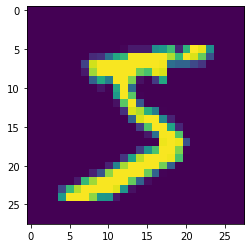

In [ ]:
plt.imshow(img)

# 2

위 함수 분석

이미지를 불러와 신경망에 적용

In [ ]:
import pickle

In [ ]:
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

In [ ]:
ls ./drive/MyDrive/sam*

./drive/MyDrive/sample_weight.pkl


In [ ]:
def init_network():
    with open('/content/drive/MyDrive/sample_weight.pkl','rb') as f:
        network = pickle.load(f)
        return network

In [ ]:
def predict(network, x):
    W1, W2, W3 = network['W1'],network['W2'],network['W3']
    b1, b2, b3 = network['b1'],network['b2'],network['b3']

    a1 = np.dot(x,W1)+b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1,W2)+b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3)+b3
    y = softmax(a3)
    return y

In [ ]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [ ]:
x , t = get_data()
network = init_network()


In [ ]:
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y) #최대값을 나타내는 인덱스 번호
    if p ==t[i]:
        accuracy_cnt += 1
print('Accuracy : ', accuracy_cnt/len(x),'%')

# 3

In [ ]:
y

array([4.2882870e-04, 2.0043001e-06, 2.5405674e-03, 2.0168900e-06,
       5.5917702e-04, 3.1262045e-04, 9.9614763e-01, 4.3499372e-07,
       6.3756811e-06, 3.7751411e-07], dtype=float32)

array([4.2882870e-04, 2.0043001e-06, 2.5405674e-03, 2.0168900e-06,
       5.5917702e-04, 3.1262045e-04, 9.9614763e-01, 4.3499372e-07,
       6.3756811e-06, 3.7751411e-07], dtype=float32)

In [ ]:
p

6

In [ ]:
t[i]

6

In [ ]:
network['W1'].shape

(784, 50)

In [ ]:
network['b1'].shape

(50,)

In [ ]:
network['W2'].shape

(50, 100)

In [ ]:
network['W3'].shape

(100, 10)

In [ ]:
x.shape, network['W1'].shape,network['W2'].shape,network['W3'].shape

((10000, 784), (784, 50), (50, 100), (100, 10))

In [ ]:
y.shape

(10,)

# 4

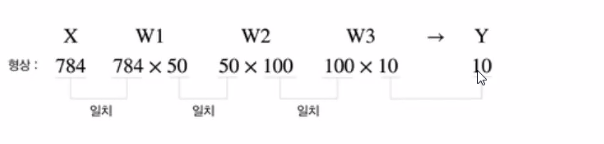

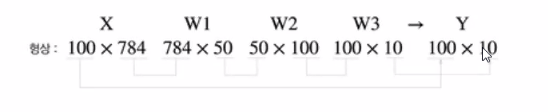

묶음 처리한다

In [ ]:
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y) #최대값을 나타내는 인덱스 번호
    if p ==t[i]:
        accuracy_cnt += 1
print('Accuracy : ', accuracy_cnt/len(x)*100,'%')

Accuracy :  93.52000000000001 %


In [ ]:
x , t = get_data()
network = init_network()
batch_size = 100
accuracy_cnt = 0
for i in range(0, len(x),batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p==t[i:i+batch_size])
print('Accuracy : ', accuracy_cnt/len(x)*100,'%')

Accuracy :  93.52000000000001 %


In [ ]:
k = np.arange(20)

In [ ]:
for i in range(0, len(k), 3):
    #print(i)
    print(k[i:i+3])

[0 1 2]
[3 4 5]
[6 7 8]
[ 9 10 11]
[12 13 14]
[15 16 17]
[18 19]


In [ ]:
y_batch.shape

(100, 10)

In [ ]:
x.shape

(10000, 784)

In [ ]:
x_batch.shape

(100, 784)

In [ ]:
p.sum(p==t[i:i+batch_size])

In [ ]:
y = np.array([1,2,1,0])
t = np.array([1,2,0,0])
print(y==t)

[ True  True False  True]


In [ ]:
np.sum(y==t)

3

손실 함수

신경망 학습에서는 현재의 상태를 '하나의 지표' 로 표현, 그 지표를 가장 좋게 만들어주는 가중치 매개변수의 값을 탐색.

손실함수 (loss function): 신경망 성능의 나쁨을 나타내는 지표

- 평균 제곱 오차
- 교차 엔트로피 오차


평균 제곱 오차

평균 제곱오차(mean squared error, MSE)수식

$$
E = \frac12∑_k(y_k - t_k)2
$$

- yk 신경망의 출력(신경망이 추정한 값)
- tk 정답 레이블
- k 데이터의 차원수

In [ ]:
y = [0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0] #softmax()를 통과한 값 = 0.1이 0일 확률인거고, 0.05는 숫자 1일 확률, 0.6은 숫자 2일 확률.....
t = [0,0,1,0,0,0,0,0,0,0] # = 레이블이 [2]이다. 

In [ ]:
def mean_squared_error(y,t):
    return 0.5*np.sum((y - t)**2)

In [ ]:
mean_squared_error(np.array(y),np.array(t))

0.09750000000000003

In [ ]:
y = [0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0]

교차 엔트로피 오차

교차 엔트로피 오차(cross entropy error, CEE) 수식
$$
E = -∑_{k}{t_k}{logy_k}
$$
- log는 밑이 e인 자연로그
- yk 신경망의 출력(신경망이 추정한 값)
- tk 정답 레이블 : 정답에 해당하는 인덱스의 원고만 1,  나머지는 0(원 - 핫 인코딩)

tk =1일때만 값이 있으므로

정답 레이블은 '2'가 정답. 신경망 출력이 0.6이라면 교차 엔트로피 오차는 -log0.6 = 0.51

같은 조건에서 신경망 출력이 0.1 이라면 -log0.1 = 2.3

그림 4-3 자연로그 y =logx그래프

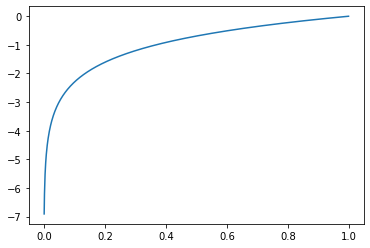

In [ ]:
x = np.arange(0.001, 1.0, 0.001)
y= np.log(x)
plt.plot(x,y)